<a href="https://colab.research.google.com/github/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/blob/main/Analisis_y_optimizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGANDO DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',3)

In [23]:
generation_data = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/data/Plant_2_Generation_Data.csv')

In [25]:
weather_data = pd.read_csv('https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/refs/heads/main/data/Plant_2_Weather_Sensor_Data.csv')

In [26]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
5516,2020-05-17 14:45:00,4136001,oZZkBaNadn6DNKz,606.400000,594.160000,5820.133333,1708100823.133333
38466,2020-06-04 03:45:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,0.000000,282724355.000000
6683,2020-05-18 04:00:00,4136001,q49J1IKaHRwDQnt,0.000000,0.000000,5727.000000,358279.000000
2528,2020-05-16 04:45:00,4136001,xMbIugepa2P7lBB,0.000000,0.000000,9465.000000,106666086.000000
56100,2020-06-12 12:00:00,4136001,rrq4fwE8jgrTyWY,609.946667,597.620000,1855.466667,121102560.466667


In [27]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
176,2020-05-16 20:15:00,4136001,iq8k7ZNt4Mwm3w0,28.205945,27.102159,0.000000
2868,2020-06-13 22:15:00,4136001,iq8k7ZNt4Mwm3w0,24.616667,23.655893,0.000000
2782,2020-06-13 00:45:00,4136001,iq8k7ZNt4Mwm3w0,23.082374,22.745495,0.000000
1662,2020-06-01 08:15:00,4136001,iq8k7ZNt4Mwm3w0,25.838382,29.698360,0.217574
1917,2020-06-04 00:30:00,4136001,iq8k7ZNt4Mwm3w0,23.517206,22.666823,0.000000


# **AJUSTANDO EL FORMATO DEL DATASET**

In [28]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


**FUSIONANDO LOS DATOS DE AMBOS DATASETS**

In [29]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
34975,2020-06-02 11:45:00,WcxssY2VbP4hApt,0.000000,0.000000,2565.000000,181837041.000000,31.075159,58.731929,0.901845
17979,2020-05-24 11:30:00,WcxssY2VbP4hApt,1268.453333,1236.753333,3826.733333,181769656.733333,33.958215,58.210037,0.928406
15298,2020-05-22 22:15:00,oZ35aAeoifZaQzV,0.000000,0.000000,9866.000000,1660028098.000000,28.326372,25.970764,0.000000
37428,2020-06-03 16:00:00,9kRcWv60rDACzjR,473.306667,464.386667,3876.000000,2247853913.000000,29.841682,37.933931,0.315477
53322,2020-06-11 04:30:00,V94E5Ben1TlhnDV,0.000000,0.000000,0.000000,1412264842.000000,24.257507,23.715880,0.000000


**AÑADIENDO COLUMNAS PARA TIEMPOS Y FECHAS**

In [30]:
# Añadiendo columnas para los dias, semanas, mes, hora...
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month


# Separando en horas y minutos
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# Date como string
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [31]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  HOURS                67698 non-

In [32]:
df_solar.isnull().sum()

,0
DATE_TIME,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DATE,0


**No hay valores faltantes en el dataset**

In [33]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,MINUTES,TOTAL MINUTES PASS
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,45.000000,1425.000000
std,nan,370.569597,362.112118,2919.448386,729667771.073221,4.021294,11.226446,0.309365,8.527546,0.499120,16.764084,415.672274


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,4


In [38]:
import os

# Crear la carpeta 'output' si no existe
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Guardar el DataFrame df_solar en la carpeta 'output' como 'df_solar.csv'
df_solar.to_csv(f'{output_dir}/df_solar.csv', index=False)



# VISUALIZACION DE DATOS

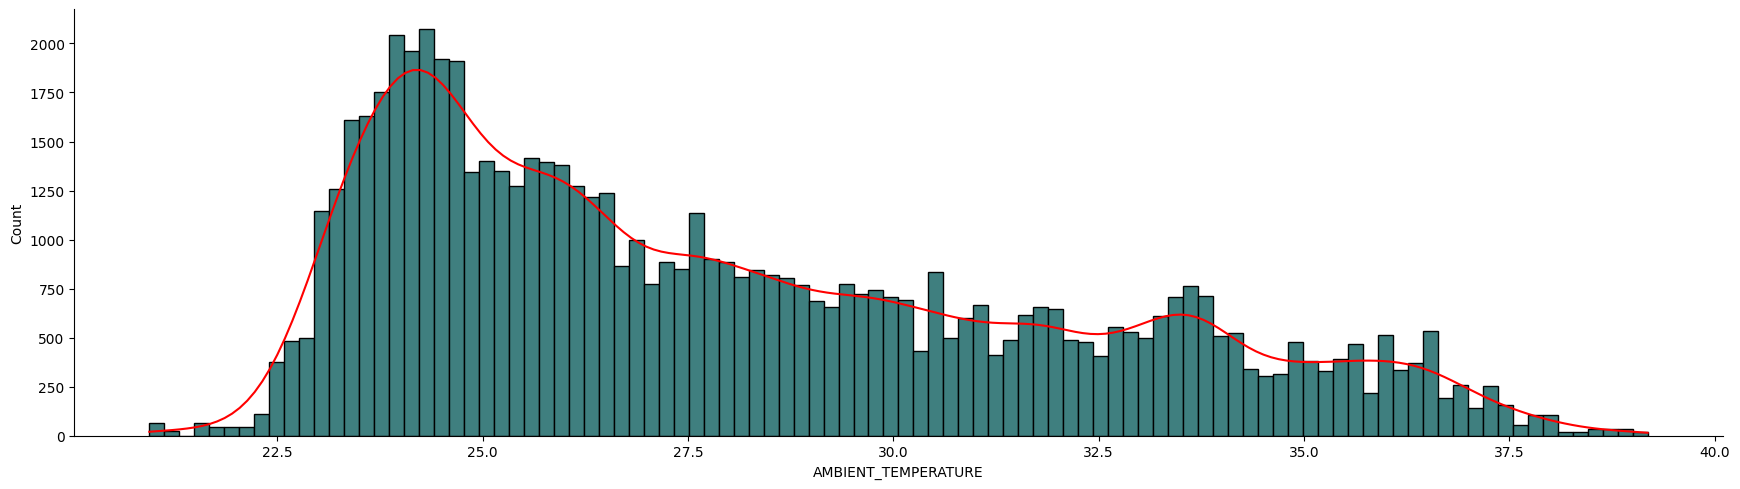

In [42]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [40]:
df_solar['DATE'].nunique()

34

El dato de generación de energía solar es de 34 días.

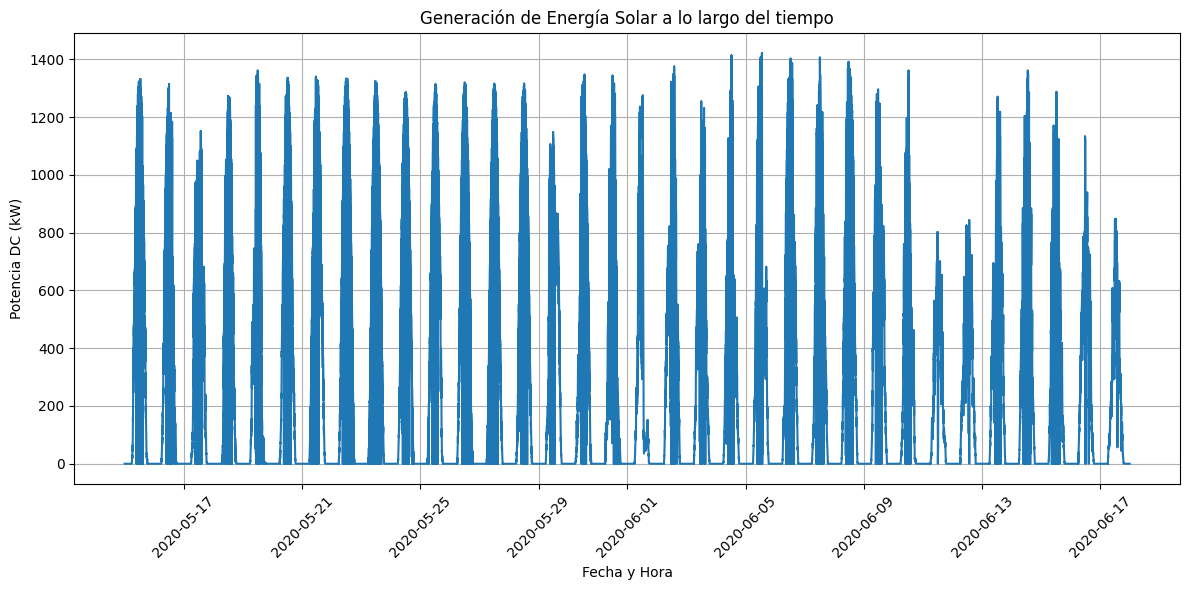

In [43]:
# Gráfico de la generación de energía a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_solar['DATE_TIME'], df_solar['DC_POWER'])
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia DC (kW)')
plt.title('Generación de Energía Solar a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

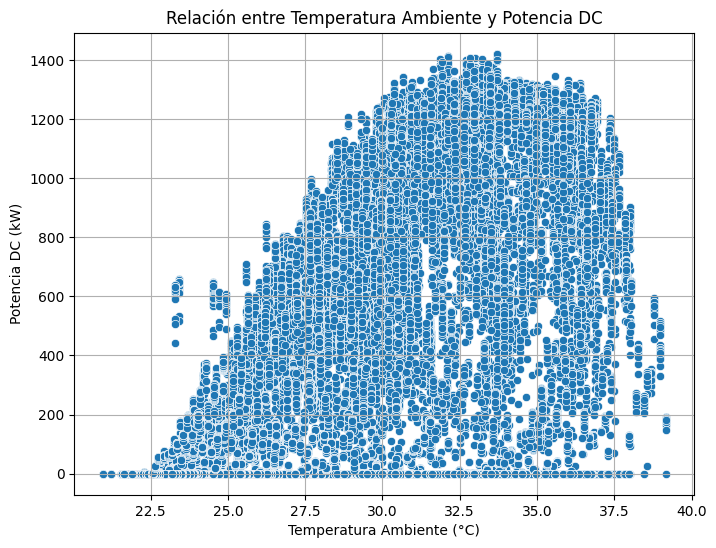

In [44]:
# Diagrama de dispersión entre temperatura ambiente y potencia DC
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', data=df_solar)
plt.xlabel('Temperatura Ambiente (°C)')
plt.ylabel('Potencia DC (kW)')
plt.title('Relación entre Temperatura Ambiente y Potencia DC')
plt.grid(True)
plt.show()

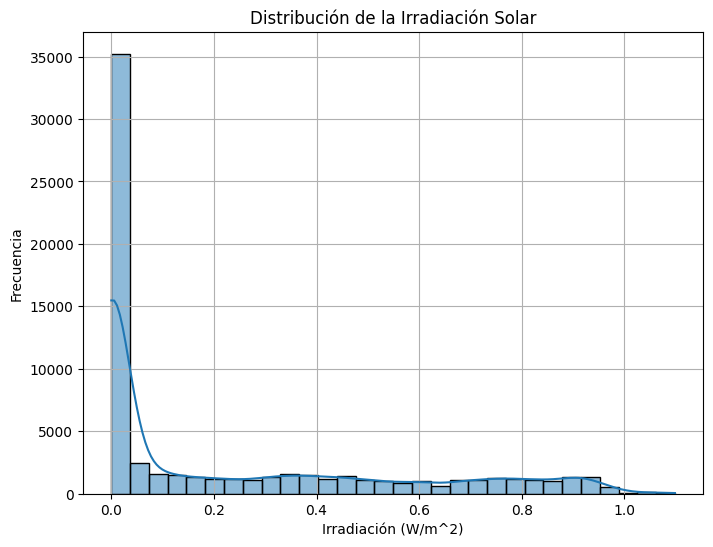

In [45]:
# Distribución de la irradiación solar
plt.figure(figsize=(8, 6))
sns.histplot(df_solar['IRRADIATION'], kde=True, bins=30)
plt.xlabel('Irradiación (W/m^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Irradiación Solar')
plt.grid(True)
plt.show()

# DETECCION DE FALLAS Y ANOMALIAS

**GRAFICOS DE GENERACION DE ENRGIA SOLAR**



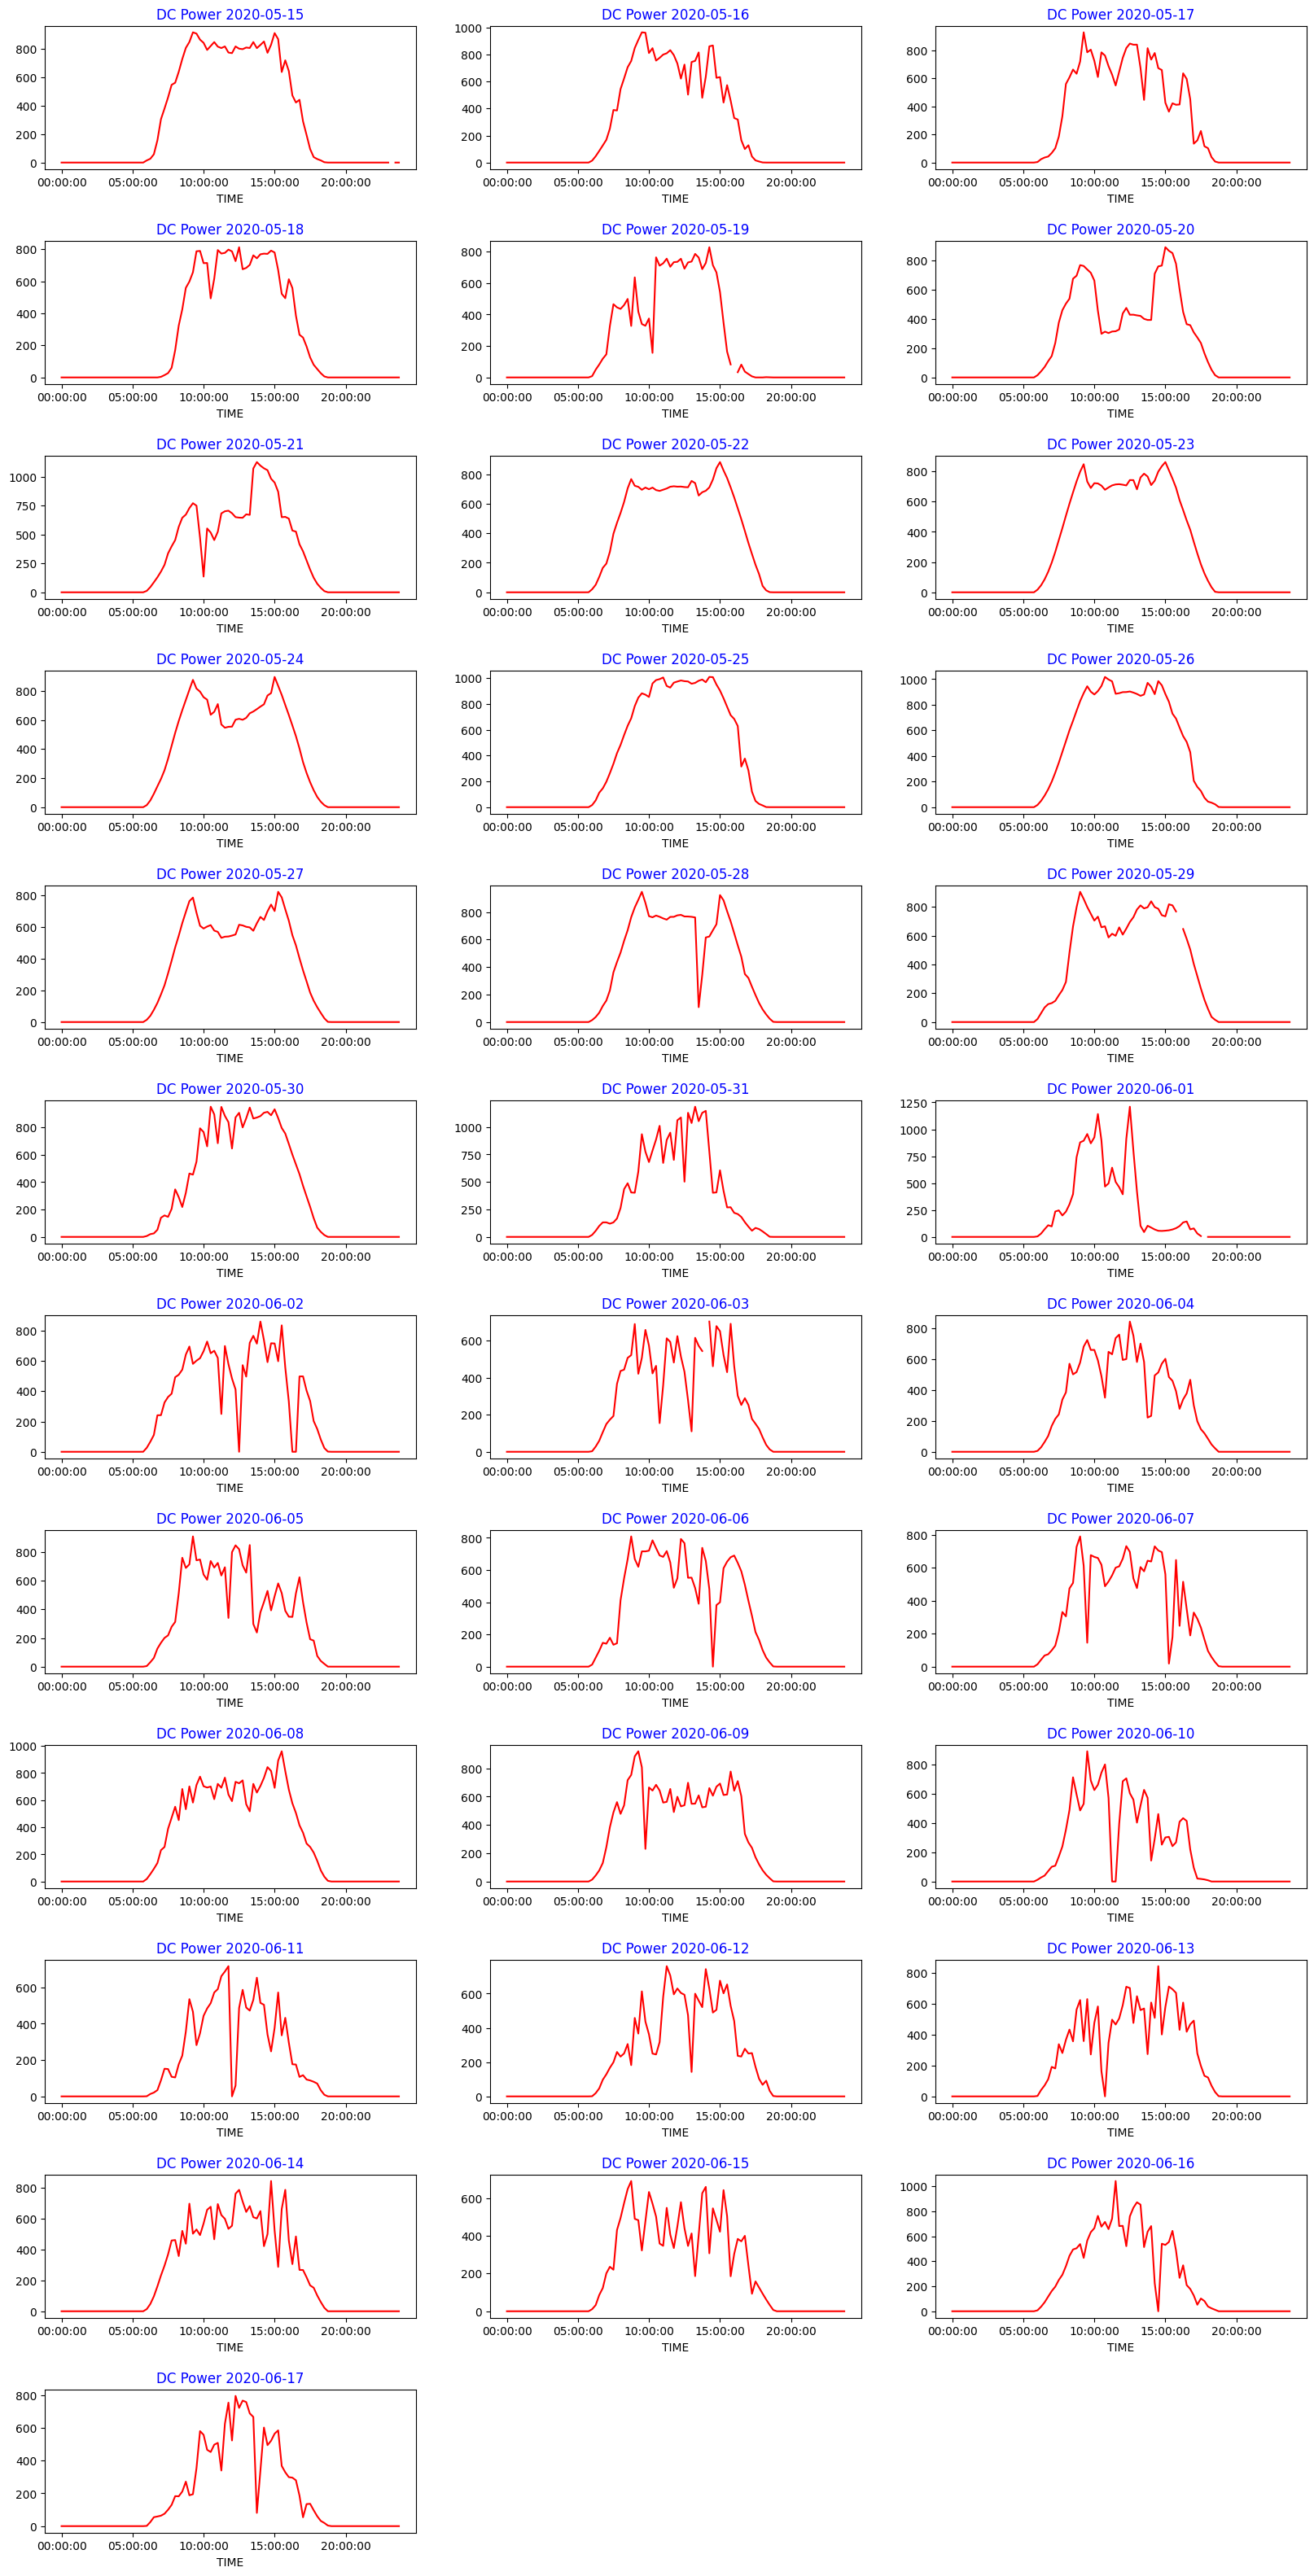

In [48]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

PRODUCCION IDEAL DE ENERGIA SOLAR EN UN DIA

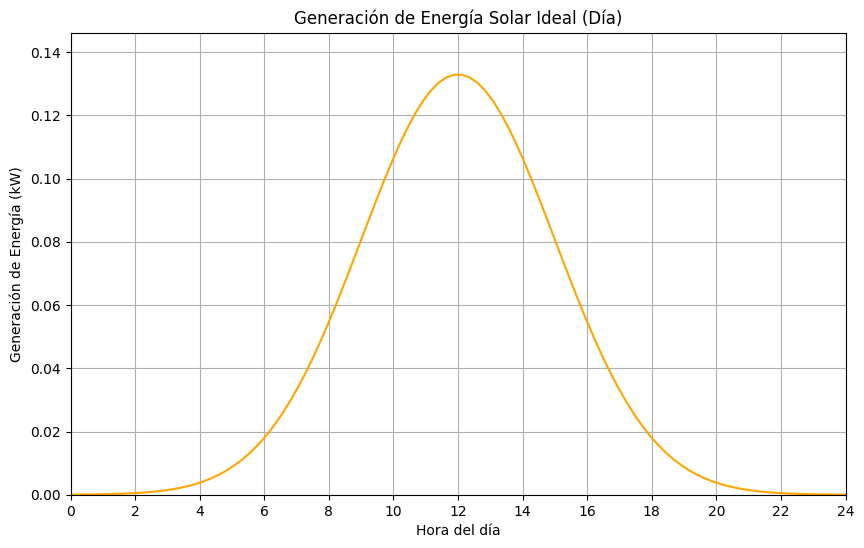

In [51]:

import matplotlib.pyplot as plt
import numpy as np

# Datos para la campana de Gauss
mu = 12  # Media (hora del día con máxima generación)
sigma = 3  # Desviación estándar (ancho de la campana)
x = np.linspace(0, 24, 100)  # Horas del día
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='orange')
plt.title('Generación de Energía Solar Ideal (Día)')
plt.xlabel('Hora del día')
plt.ylabel('Generación de Energía (kW)')
plt.grid(True)
plt.xlim(0, 24)  # Ajustar los límites del eje x
plt.ylim(0, max(y) * 1.1)  # Ajustar los límites del eje y para mejor visualización
plt.xticks(np.arange(0, 25, 2))  # Etiquetas del eje x cada 2 horas
plt.show()

La razón por la que obtenemos esta forma se basa en el ángulo del sol con respecto a los paneles. Temprano en la mañana, cuando el sol aún está saliendo, se encuentra esencialmente en su punto más bajo en el cielo. Para que la luz del sol llegue a los paneles a esta hora del día, tiene que atravesar la mayor cantidad de atmósfera. Es importante tener esto en cuenta, porque la energía del sol se absorbe cuando viaja a través de la atmósfera. Entonces, esto significa que cuanta más atmósfera atraviese, más energía se absorberá y menos estará disponible para que sus paneles la conviertan en electricidad. Al mediodía, cuando el sol está directamente sobre nosotros, la luz del sol no necesita atravesar tanta atmósfera. Por lo tanto, los paneles absorberán más luz solar durante este tiempo.

**CONSUMO DIARIO DE ENERGIA SOLAR**

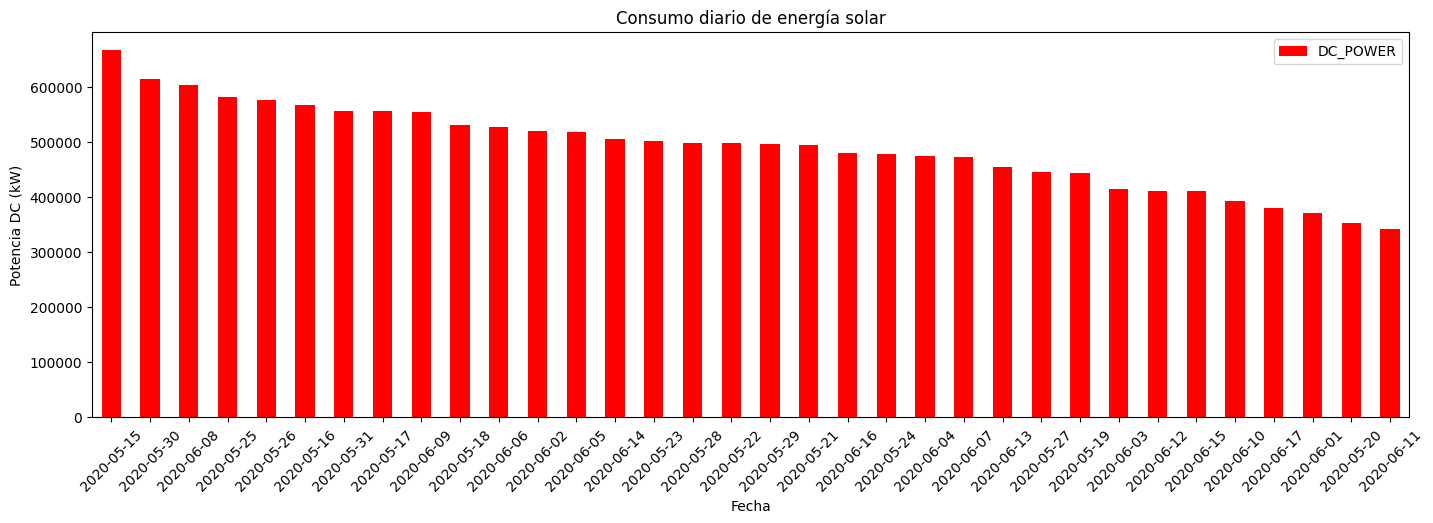

In [54]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Consumo diario de energía solar')
plt.ylabel('Potencia DC (kW)')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.show()

*   La generación de DC_POWER promedio más alta está activada: 2020-05-15
*   La generación de DC_POWER promedio más baja está activada: 2020-06-11

**IRRADIACION POR DIA.**

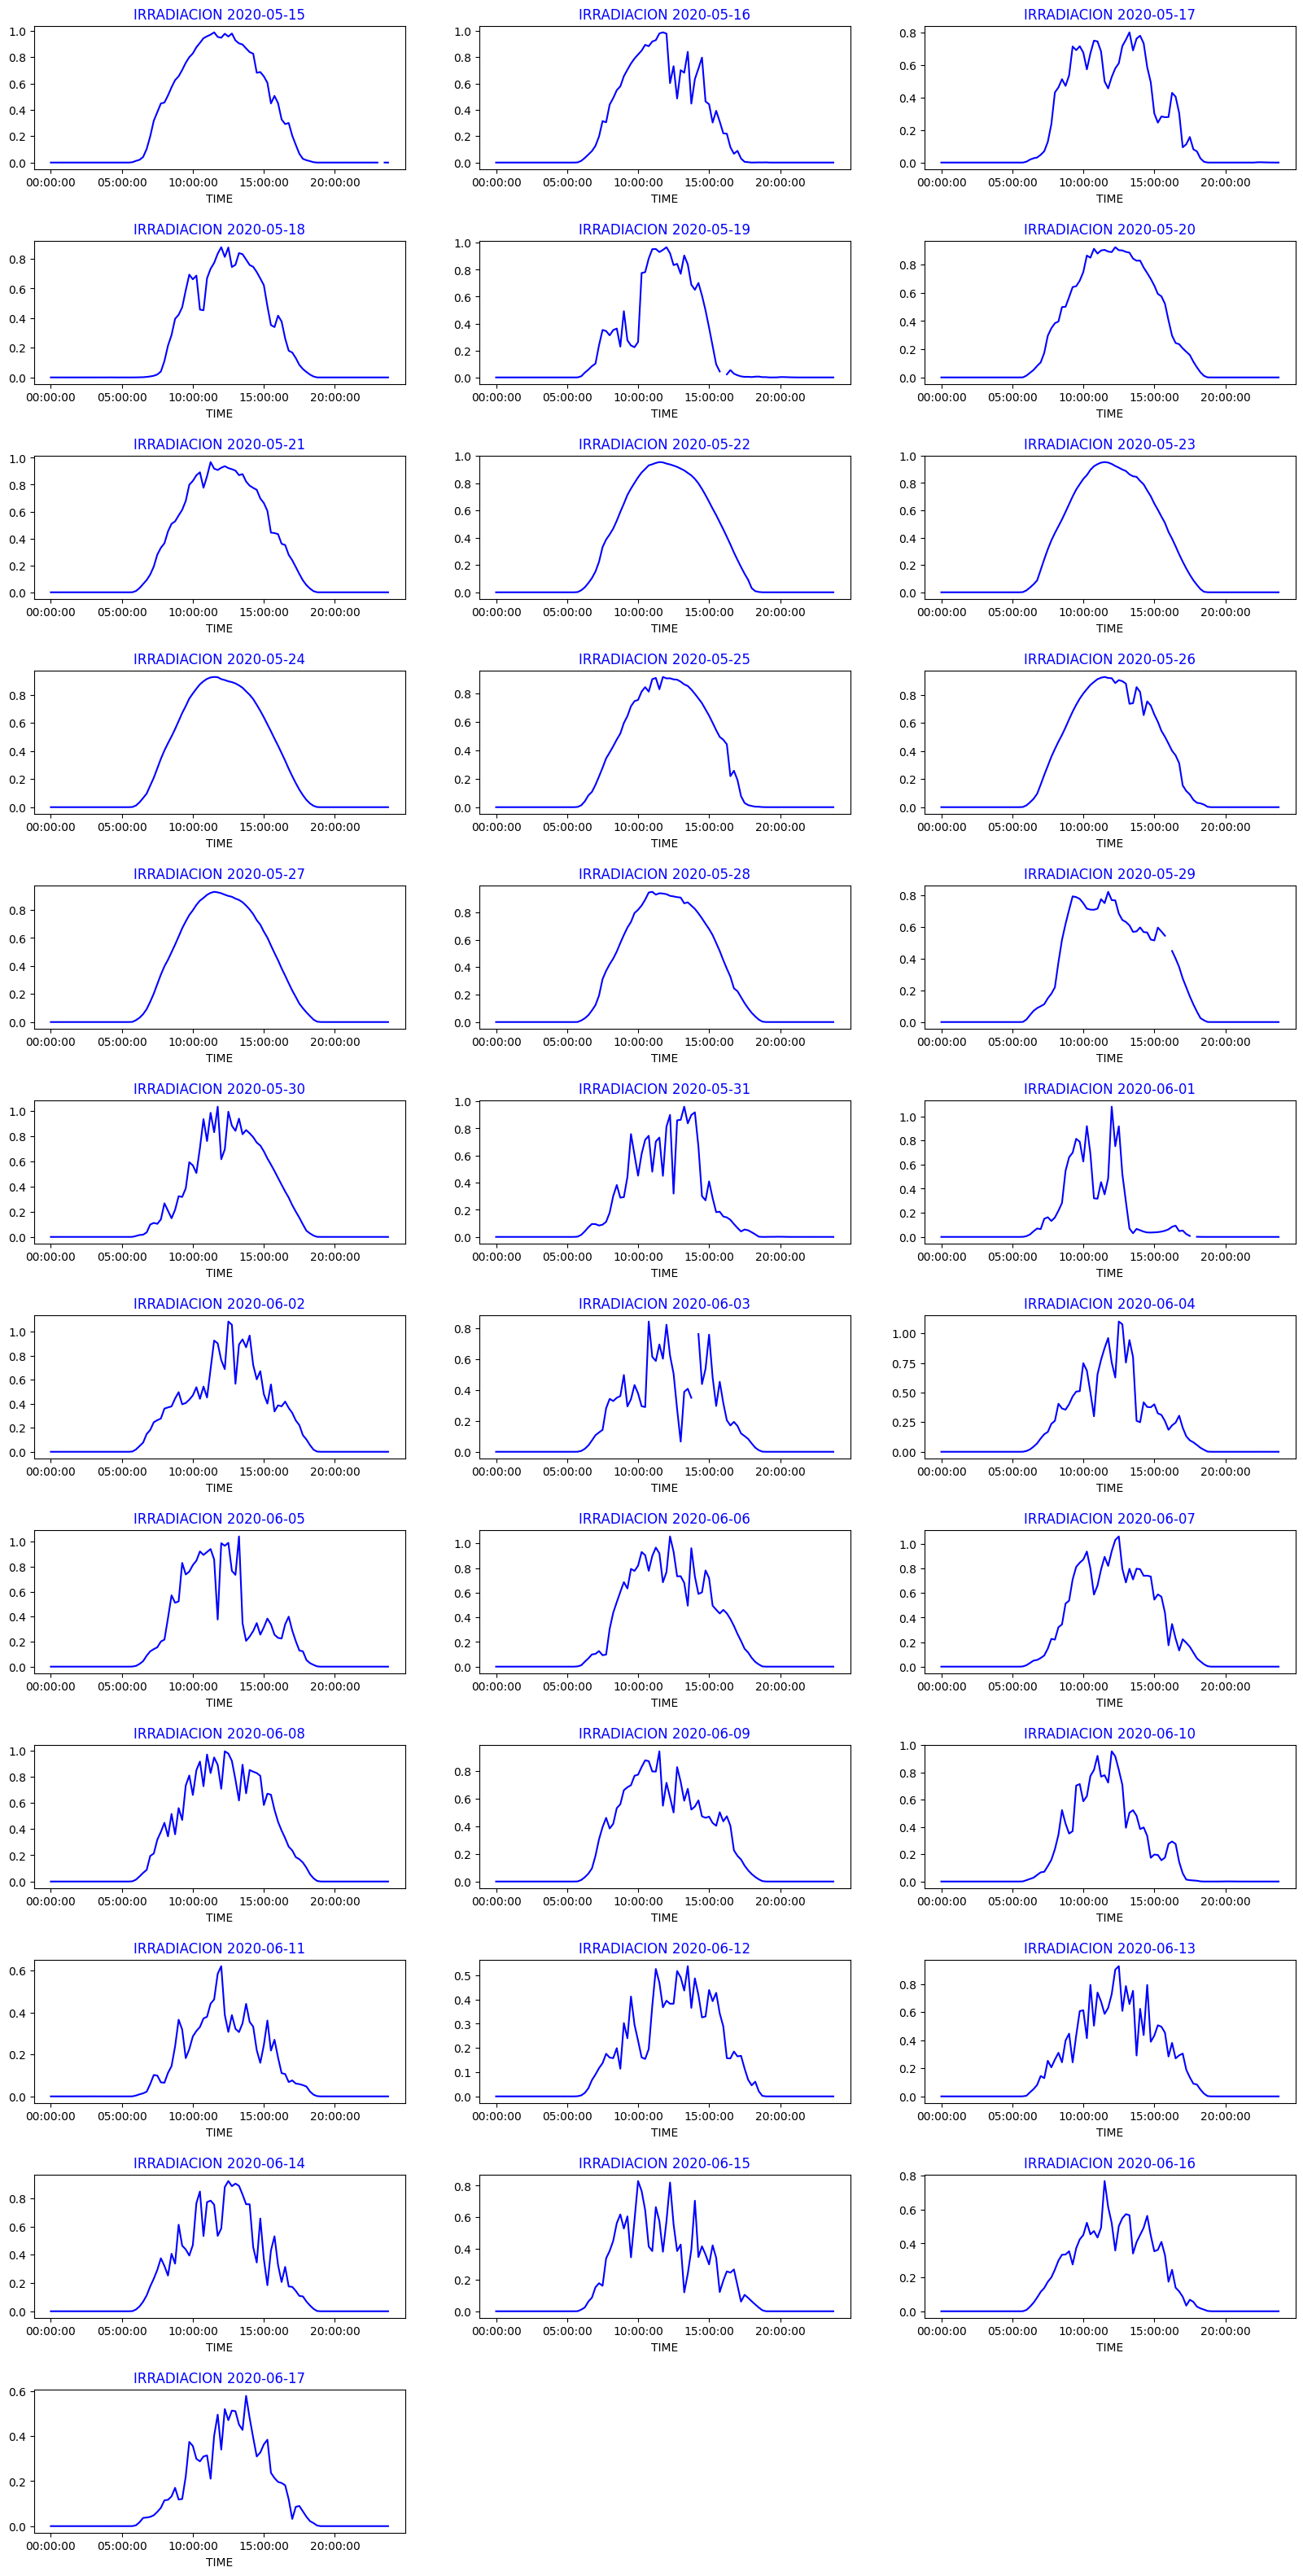

In [57]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIACION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

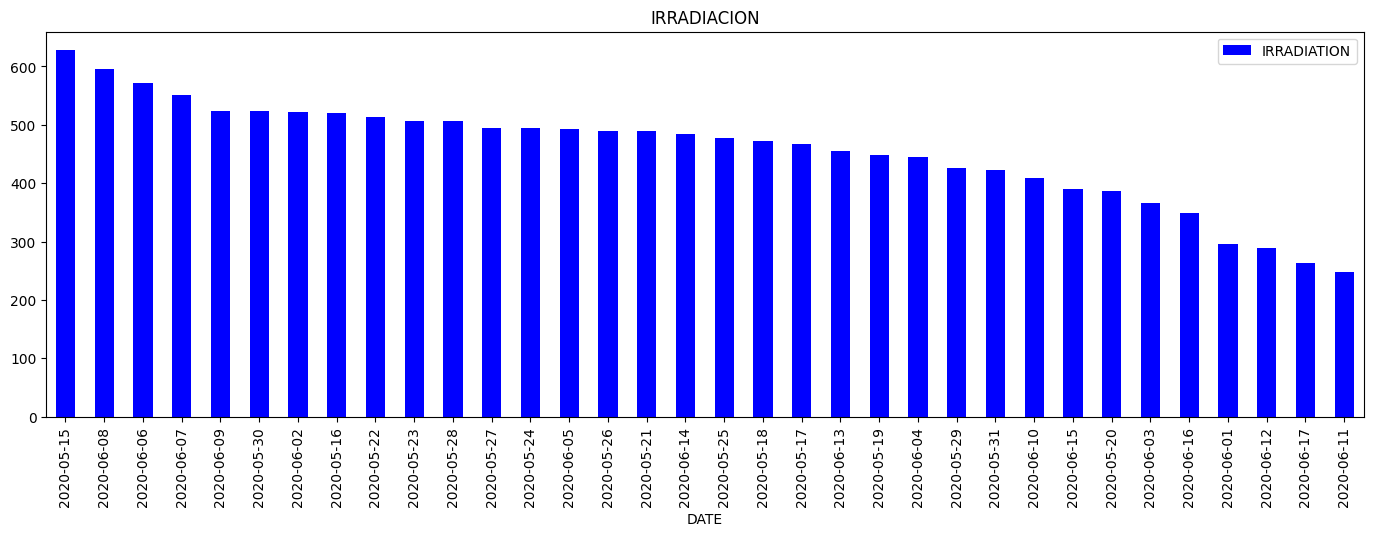

In [58]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIACION')
plt.show()

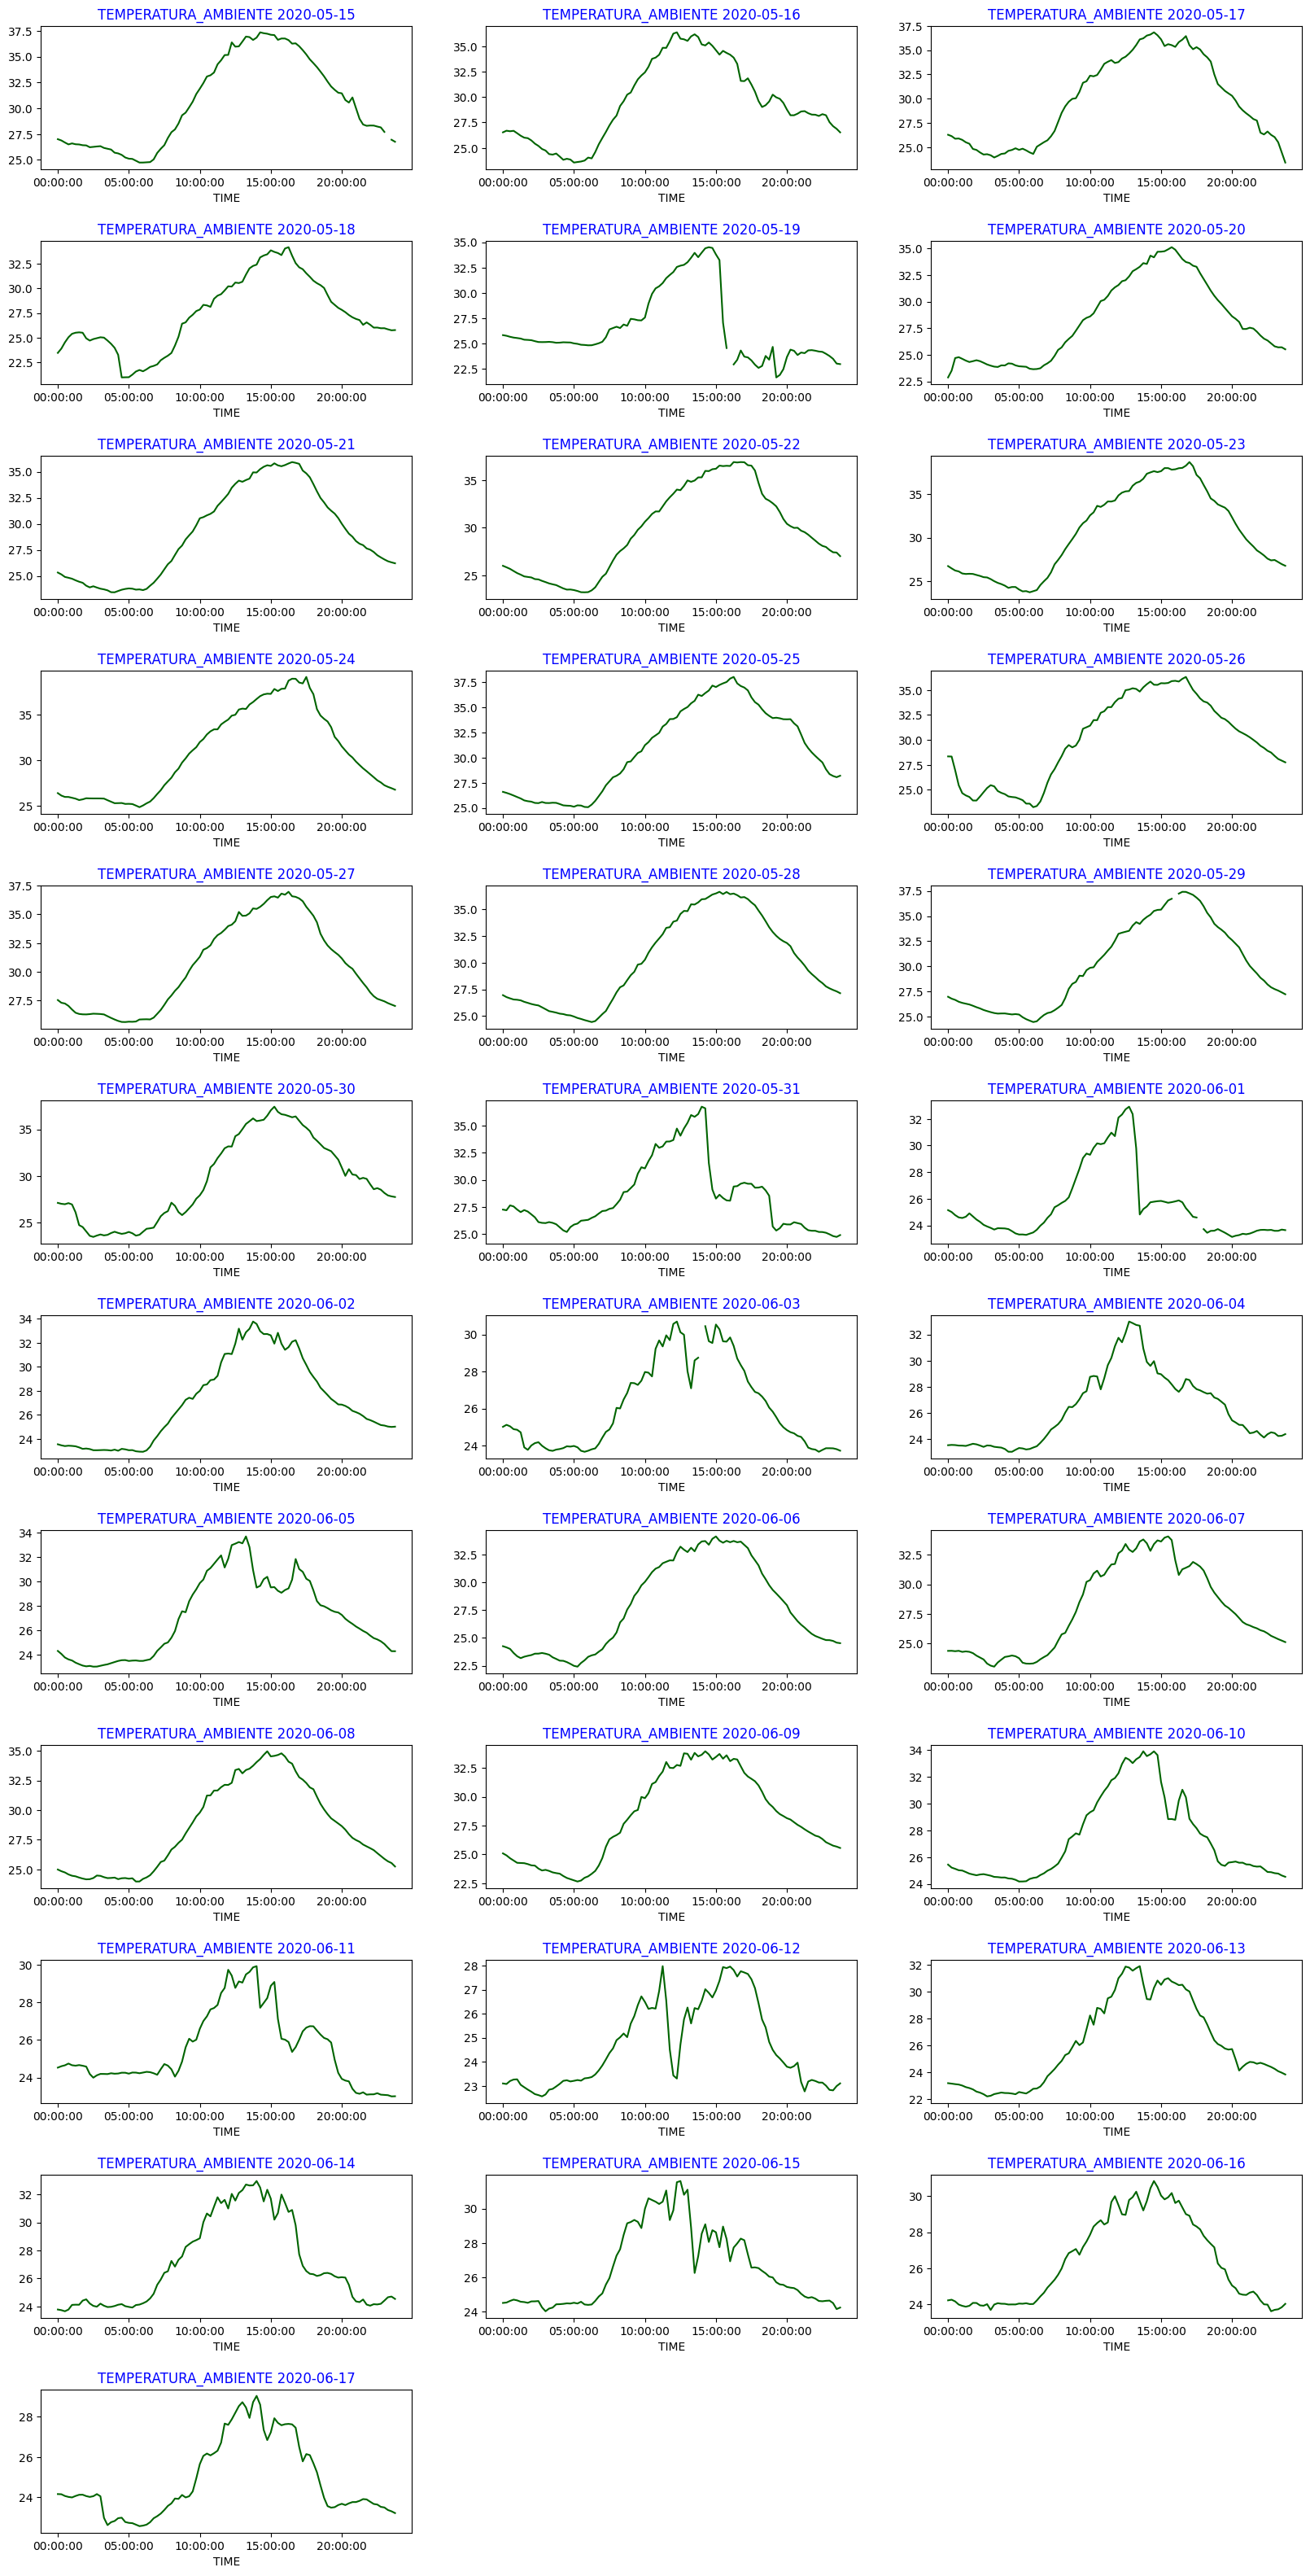

In [59]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='TEMPERATURA_AMBIENTE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

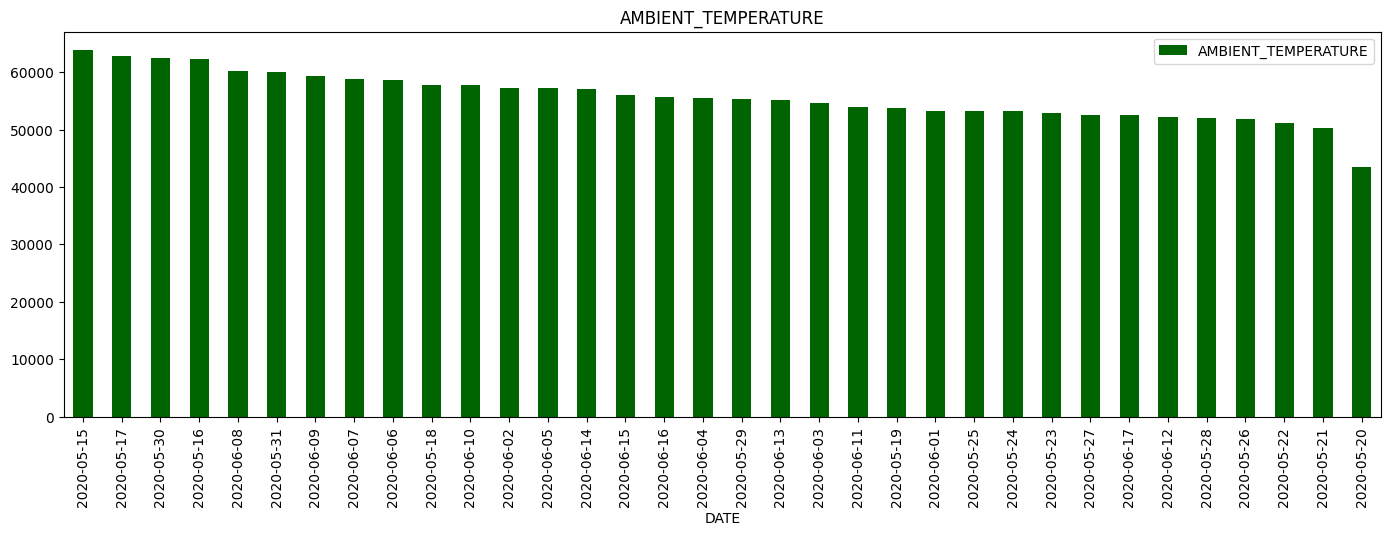

In [60]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

**ANALIZANDO EL MEJOR DIA**

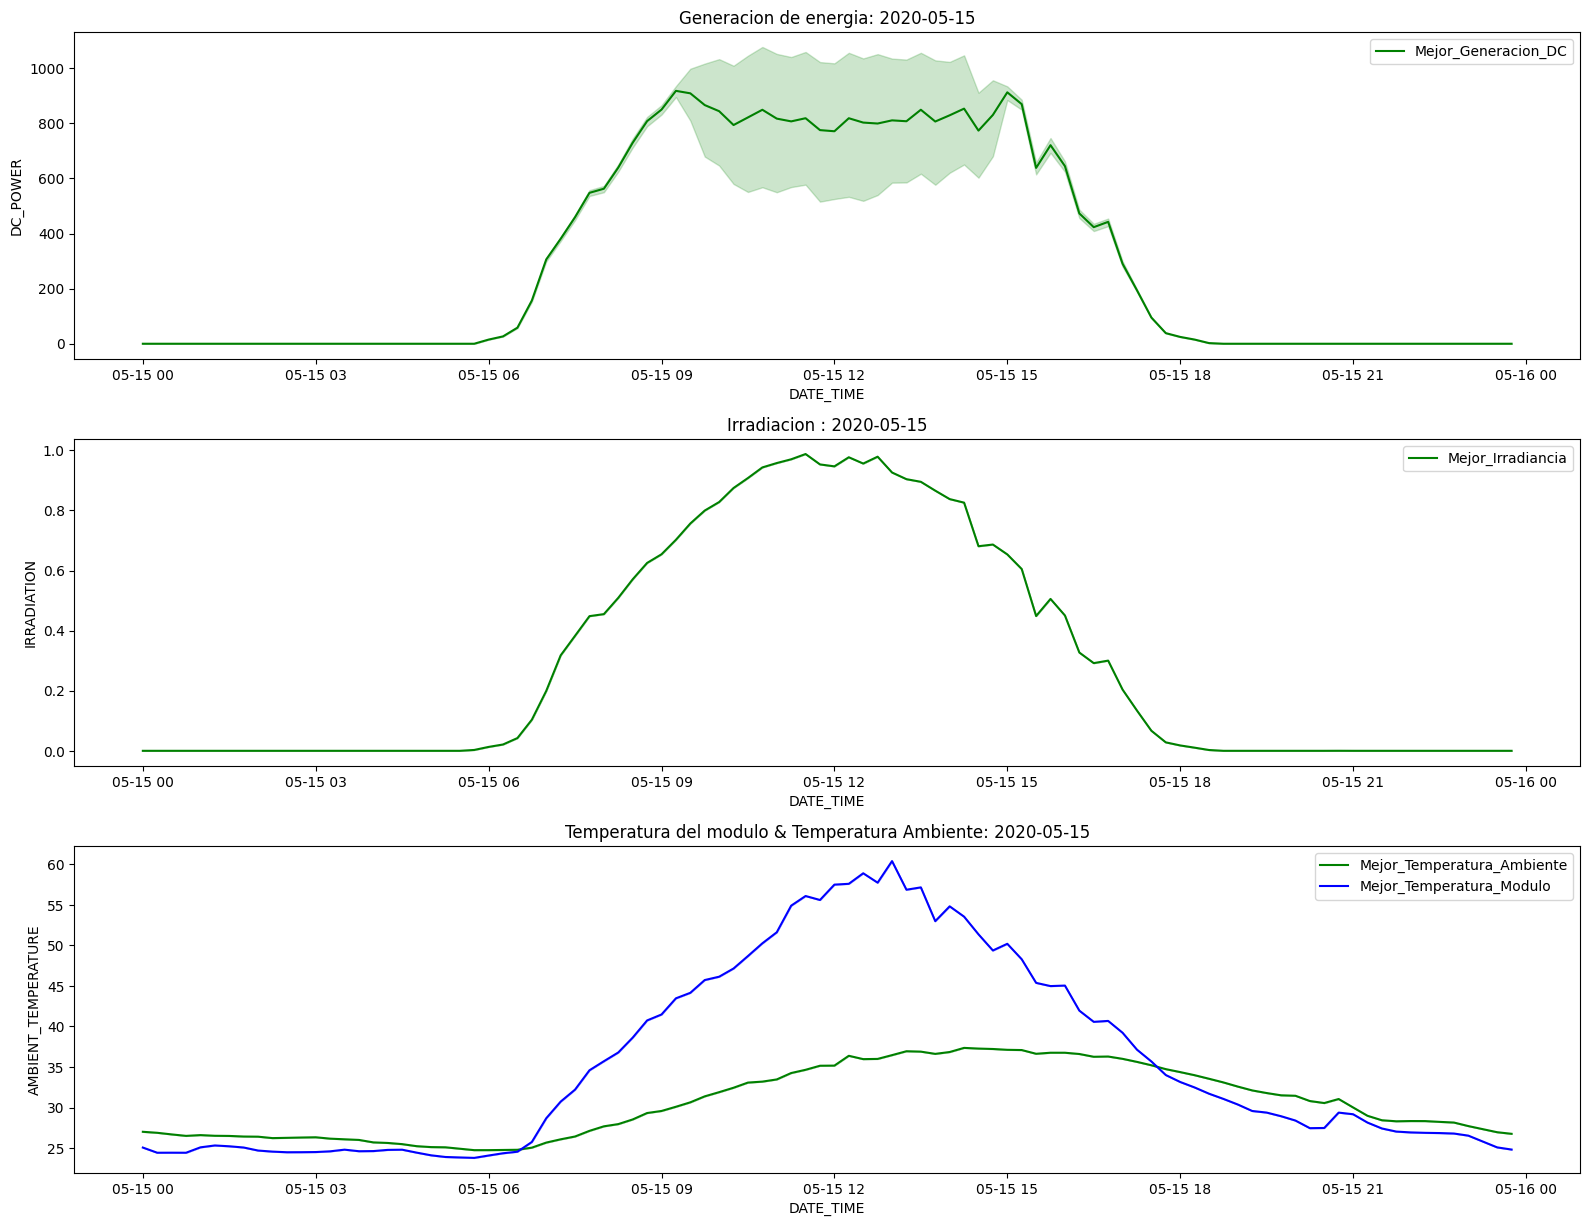

In [62]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='DC_POWER', label="Mejor_Generacion_DC",color='green')
plt.title("Generacion de energia: {}" .format(date[0]))

plt.subplot(412)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='IRRADIATION', label="Mejor_Irradiancia",color='green')
plt.title("Irradiacion : {}" .format(date[0]))

plt.subplot(413)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='AMBIENT_TEMPERATURE', label="Mejor_Temperatura_Ambiente",color='green')
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='MODULE_TEMPERATURE', label="Mejor_Temperatura_Modulo",color='blue')
plt.title("Temperatura del modulo & Temperatura Ambiente: {}" .format(date[0]));

plt.tight_layout()
plt.show()

LA MENOR VARIACION DE IRRADIANCIA, TEMPERATURA DEL PANEL, Y TEMPERATURA AMBIENTE INDICA QUE ESE DIA HUBO POCAS NUBES EN EL CIELO

**ANALIZANDO EL PEOR DIA**

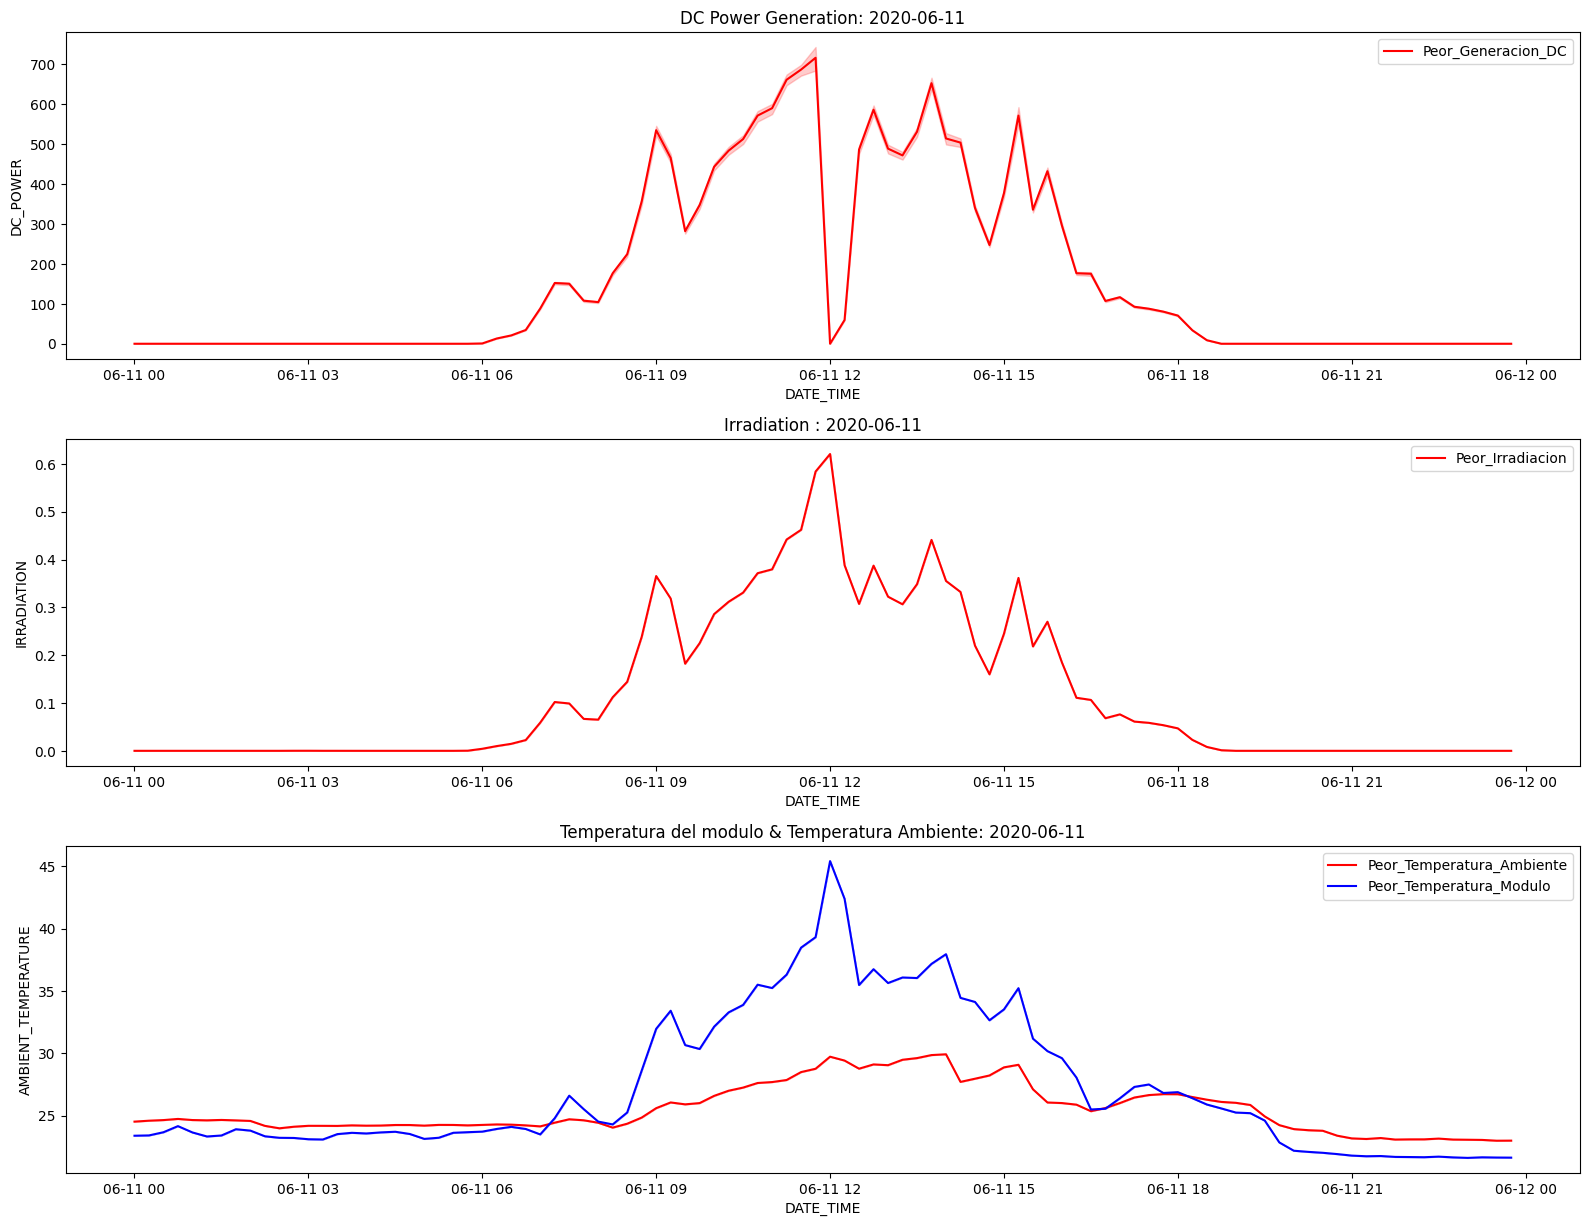

In [65]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='DC_POWER', label="Peor_Generacion_DC",color='red')
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='IRRADIATION', label="Peor_Irradiacion",color='red')
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='AMBIENT_TEMPERATURE', label="Peor_Temperatura_Ambiente",color='red')

sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x='DATE_TIME', y='MODULE_TEMPERATURE', label="Peor_Temperatura_Modulo",color='blue')
plt.title("Temperatura del modulo & Temperatura Ambiente: {}" .format(date[0]));

plt.tight_layout()
plt.show()

**Posibles razones de estas grandes fluctuaciones en DC_POWER, IRRADIACIÓN, temperatura ambiente, temperatura del módulo:**





Aproximadamente a las 12 en punto se produce una fuerte caída en la generación DC_POWER de 700 a casi 20 KW.

Y al mismo tiempo la IRRADIACIÓN cae de 0,6 a 0,3 casi la mitad.

La temperatura ambiente y la temperatura del módulo también caen drásticamente. La temperatura del módulo de 45 C a 35 C y la temperatura ambiente también se reducen.

**La posible razón de esta reducción se debe a que pueden haber fuertes lluvias, un cielo muy nublado y mal tiempo. Hay casi menos posibilidades de que se produzca algún fallo en el sistema.**

# EFICIENCIA DEL INVERSOR

In [66]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [68]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Relación de potencia AC/CD (eficiencia) de la planta de energía solar:  {solar_plant_eff:0.3f} %")

Relación de potencia AC/CD (eficiencia) de la planta de energía solar:  97.501 %


In [69]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [70]:

#Aquí tomamos todos los valores de CD distintos de cero y los trazamos en un histograma.
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

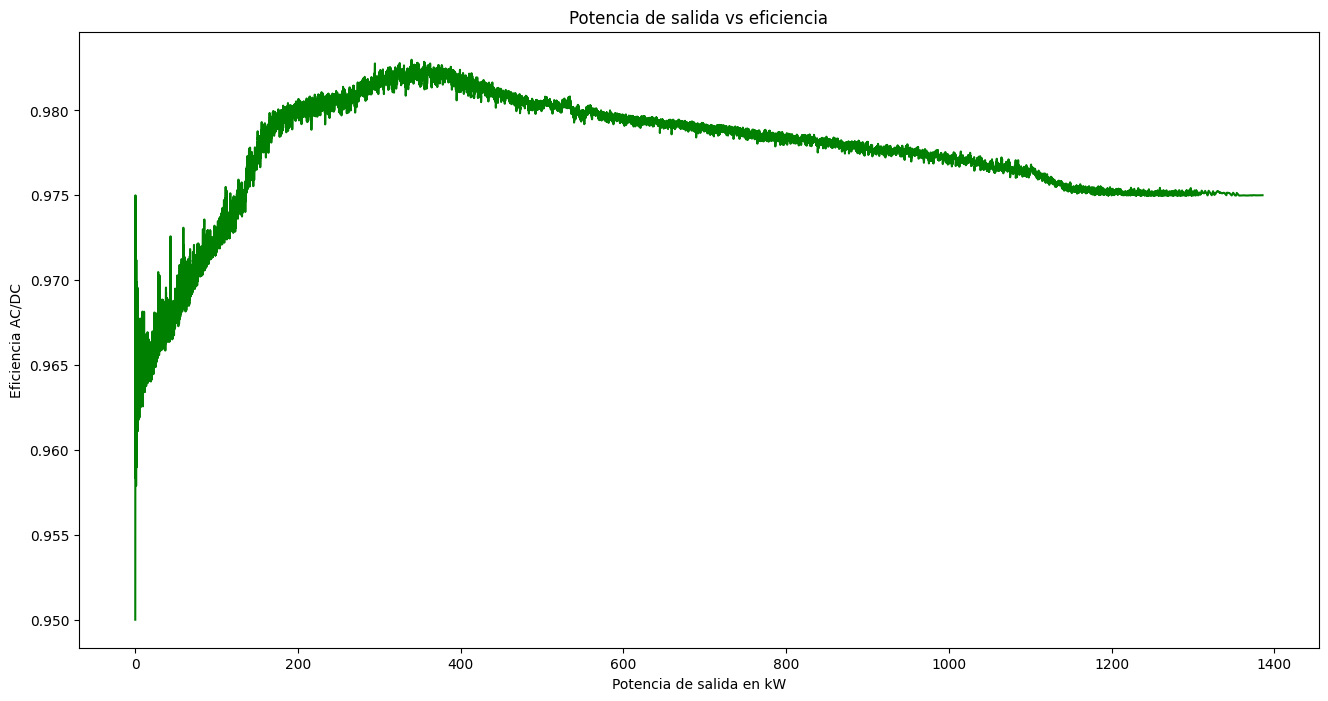

In [71]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Potencia de salida en kW')
plt.ylabel('Eficiencia AC/DC')
plt.title('Potencia de salida vs eficiencia');

[EFICIENCIA DEL INVERSOR](https://www.inverter.com/what-is-inverter-efficiency)